<a href="https://colab.research.google.com/github/ebaadazam/CodeClause-Spam-Classifier-Project/blob/main/Mask_Detection_Using_Python_And_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Importing face Mask Dataset

##### API to fetch the dataset from Kaggle

In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:01<00:00, 159MB/s]
100% 163M/163M [00:01<00:00, 133MB/s]


#####Extracting the compressed dataset

In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


#Importing the Libraries

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [9]:
#listdir function will create a list which contains all the files names with mask folder
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_229.jpg', 'with_mask_293.jpg', 'with_mask_1627.jpg', 'with_mask_3291.jpg', 'with_mask_3401.jpg']
['with_mask_2926.jpg', 'with_mask_3416.jpg', 'with_mask_2550.jpg', 'with_mask_1266.jpg', 'with_mask_1545.jpg']


In [10]:
#listdir function will create a list which contains all the files names with mask folder
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2524.jpg', 'without_mask_1104.jpg', 'without_mask_188.jpg', 'without_mask_2700.jpg', 'without_mask_628.jpg']
['without_mask_310.jpg', 'without_mask_1851.jpg', 'without_mask_1193.jpg', 'without_mask_3008.jpg', 'without_mask_2392.jpg']


In [11]:
#We are going to count the no of elements in both the lists so that the dataset is balanced
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


#####Creating Labels for the two class of Images

#####With Mask - 1
#####Without Mask - 0

In [13]:
# create the labels as 1 and 0 in the form of a list

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])
print(len(with_mask_labels))

print(without_mask_labels[0:5])
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
3725
[0, 0, 0, 0, 0]
3828


#Displaying the Images

Displaying With Mask Image

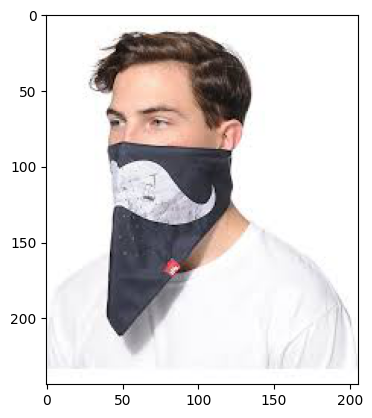

In [22]:
img = mpimg.imread('/content/data/with_mask/with_mask_3119.jpg')
imgplot = plt.imshow(img)
plt.show()

Displaying Without Mask Image

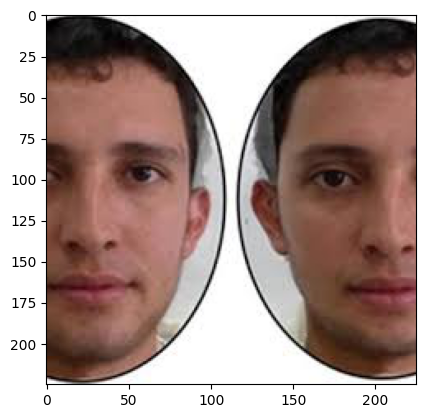

In [24]:
img = mpimg.imread('/content/data/without_mask/without_mask_2125.jpg')
imgplot = plt.imshow(img)
plt.show()

#Image Processing

1 Resize the Images

2 Convert the images to numpy array

In [25]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
data[0]

array([[[31, 36, 42],
        [31, 36, 42],
        [30, 35, 41],
        ...,
        [35, 37, 37],
        [40, 42, 43],
        [43, 43, 46]],

       [[30, 36, 41],
        [31, 36, 42],
        [31, 36, 42],
        ...,
        [35, 37, 36],
        [39, 41, 41],
        [42, 43, 44]],

       [[30, 35, 41],
        [31, 36, 42],
        [33, 37, 44],
        ...,
        [34, 36, 35],
        [38, 40, 39],
        [40, 42, 41]],

       ...,

       [[24, 28, 39],
        [24, 28, 39],
        [25, 29, 40],
        ...,
        [15, 16, 20],
        [17, 18, 22],
        [18, 19, 23]],

       [[27, 31, 42],
        [27, 31, 42],
        [27, 31, 42],
        ...,
        [14, 15, 19],
        [15, 16, 20],
        [16, 17, 21]],

       [[28, 32, 43],
        [28, 32, 43],
        [27, 31, 42],
        ...,
        [14, 15, 19],
        [15, 16, 20],
        [15, 16, 20]]], dtype=uint8)

In [28]:
print(type(data[0]))
print(data[0].shape)

<class 'numpy.ndarray'>
(128, 128, 3)


#Converting image list and label list to numpy arrays


In [33]:
X = np.array(data)
Y = np.array(with_mask_labels + without_mask_labels)

In [34]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


#Train Test Split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


#####Scaling the data

In [37]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [38]:
X_train[0]

array([[[211, 210, 218],
        [211, 210, 218],
        [211, 210, 218],
        ...,
        [237, 237, 245],
        [228, 228, 236],
        [227, 227, 235]],

       [[212, 211, 219],
        [212, 211, 219],
        [212, 211, 219],
        ...,
        [212, 212, 220],
        [213, 213, 221],
        [213, 213, 221]],

       [[215, 214, 222],
        [215, 214, 222],
        [215, 214, 222],
        ...,
        [214, 214, 222],
        [213, 213, 221],
        [213, 213, 221]],

       ...,

       [[209, 208, 216],
        [209, 208, 216],
        [209, 208, 216],
        ...,
        [212, 209, 216],
        [214, 211, 218],
        [214, 211, 218]],

       [[209, 208, 216],
        [209, 208, 216],
        [209, 208, 216],
        ...,
        [212, 209, 216],
        [214, 211, 218],
        [215, 212, 219]],

       [[208, 207, 215],
        [208, 207, 215],
        [208, 207, 215],
        ...,
        [212, 209, 216],
        [213, 210, 217],
        [214, 211, 218]]

In [39]:
X_train_scaled[0]

array([[[0.82745098, 0.82352941, 0.85490196],
        [0.82745098, 0.82352941, 0.85490196],
        [0.82745098, 0.82352941, 0.85490196],
        ...,
        [0.92941176, 0.92941176, 0.96078431],
        [0.89411765, 0.89411765, 0.9254902 ],
        [0.89019608, 0.89019608, 0.92156863]],

       [[0.83137255, 0.82745098, 0.85882353],
        [0.83137255, 0.82745098, 0.85882353],
        [0.83137255, 0.82745098, 0.85882353],
        ...,
        [0.83137255, 0.83137255, 0.8627451 ],
        [0.83529412, 0.83529412, 0.86666667],
        [0.83529412, 0.83529412, 0.86666667]],

       [[0.84313725, 0.83921569, 0.87058824],
        [0.84313725, 0.83921569, 0.87058824],
        [0.84313725, 0.83921569, 0.87058824],
        ...,
        [0.83921569, 0.83921569, 0.87058824],
        [0.83529412, 0.83529412, 0.86666667],
        [0.83529412, 0.83529412, 0.86666667]],

       ...,

       [[0.81960784, 0.81568627, 0.84705882],
        [0.81960784, 0.81568627, 0.84705882],
        [0.81960784, 0

#Build a Convolutional Neural Networks (CNN)

In [40]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

#####Compile the Neural Network

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

#####Train the Neural Network

In [43]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 154s 899ms/step - loss: 0.4652 - acc: 0.7979 - val_loss: 0.3272 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 154s 905ms/step - loss: 0.2862 - acc: 0.8884 - val_loss: 0.3115 - val_acc: 0.8645
Epoch 3/5
170/170 [==============================] - 143s 840ms/step - loss: 0.2192 - acc: 0.9178 - val_loss: 0.2554 - val_acc: 0.9041
Epoch 4/5
170/170 [==============================] - 147s 867ms/step - loss: 0.1850 - acc: 0.9273 - val_loss: 0.2013 - val_acc: 0.9240
Epoch 5/5
170/170 [==============================] - 146s 855ms/step - loss: 0.1393 - acc: 0.9479 - val_loss: 0.2149 - val_acc: 0.9157


#Model Evaluation

In [44]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 224ms/step - loss: 0.2020 - acc: 0.9259
Test Accuracy = 0.9258769154548645


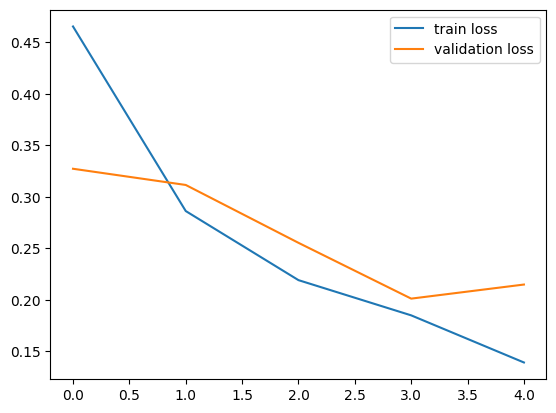

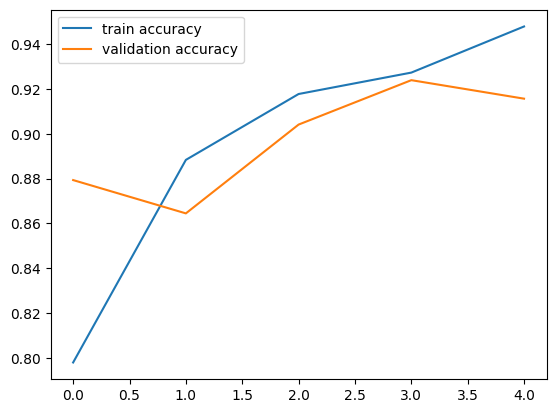

In [45]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#Predictive System

In [63]:
def final_image(input_image_path):
  input_image_path = input('Please Enter the Path of the Image to be predicted: ')

  input_image = cv2.imread(input_image_path)

  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  input_image_scaled = input_image_resized/255

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)


  input_pred_label = np.argmax(input_prediction)
  print(input_pred_label)

  if input_pred_label == 1:
    return 'The person in the image is not wearing a mask'
  return 'The person in the image is wearing a mask'

Please Enter the Path of the Image to be predicted: /content/ebaad_image.jpg


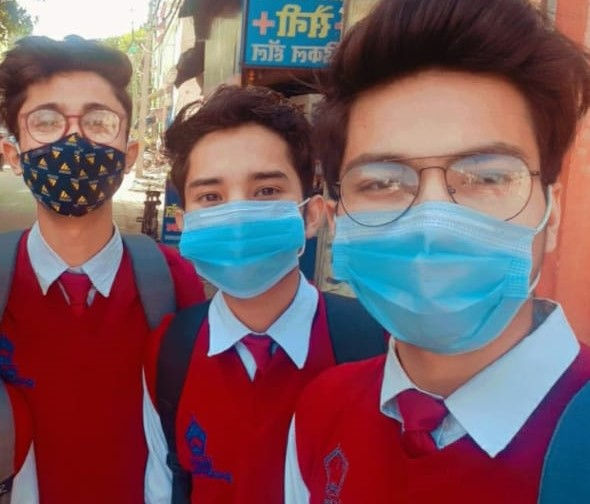

1/1 [==============================] - 0s 56ms/step
[[0.6436621  0.24971415]]
0
The person in the image is wearing a mask


In [64]:
print(final_image('/content/ebaad_image.jpg'))

Please Enter the Path of the Image to be predicted: /content/ebaadresumeimage (1).jpg


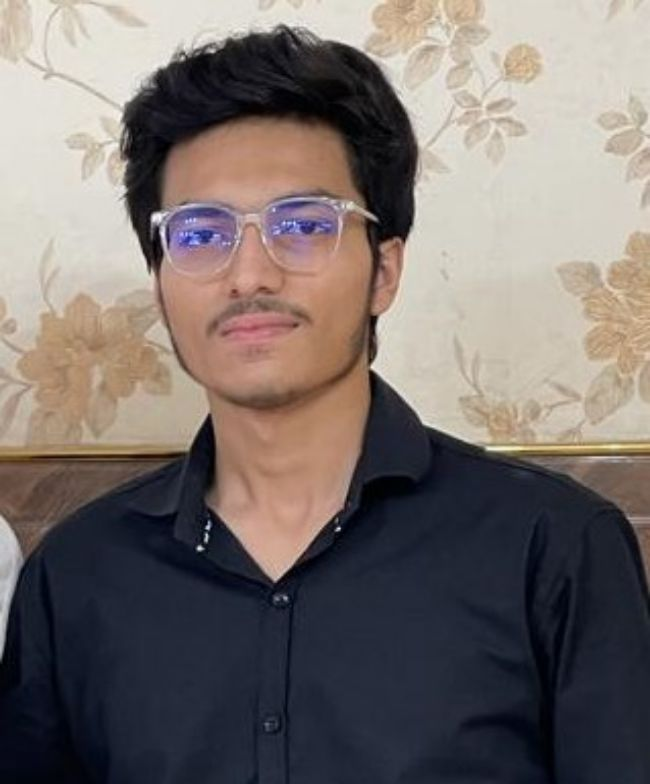

1/1 [==============================] - 0s 45ms/step
[[0.34440336 0.69459885]]
1
The person in the image is not wearing a mask


In [66]:
print(final_image('/content/ebaadresumeimage (1).jpg'))